In [133]:
import pandas as pd
import numpy as np
import os
from pandas.api.types import is_numeric_dtype
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, Normalize
import seaborn as sns

## First: extract only relevant stations

In [32]:
#Useful global variables
stations=['pampulha', 'cercadinho', 'florestal', 'ibirite', 'sete lagoas', 'divinopolis', 'ouro branco','timoteo','oliveira',
          'manhuacu', 'barbacena', 'sao joao del rei', 'dores do indaia', 'curvelo', 'guanhaes']

codes = {'pampulha':'3106200','cercadinho':'3106200','florestal':'3126000','ibirite':'3129806','sete lagoas':'3167202',
        'divinopolis':'3122306','ouro branco':'3145901','timoteo':'3168705','oliveira':'3145604','manhuacu':'3139409',
         'barbacena':'3105608','sao joao del rei':'3162500','dores do indaia':'3123205','curvelo':'3120904','guanhaes':'3128006'}

years = ['2017','2018','2019','2020','2021']

In [33]:
for y in years:
    count=0
    for file in os.listdir(y):
        if not any(substring in file.lower() for substring in stations):
            os.remove(y+'/'+file)
        else:
            count+=1
    print(count)

15
15
15
15
15


## Then, clean data so it is useable

In [34]:
df=pd.read_csv('2021/INMET_SE_MG_A535_FLORESTAL_01-01-2021_A_31-12-2021.CSV',encoding='latin1',sep=';',skiprows=8)
df.head()

,Data,Hora UTC,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",Unnamed: 19
0,2021/01/01,0000 UTC,0,929,"929,1","928,8",NaN,22,"19,3","22,9","21,8","19,7","19,1",85.0,82.0,85.0,135.0,"1,4",",1",NaN
1,2021/01/01,0100 UTC,0,"929,8","929,8",929,NaN,21,19,22,21,"19,4","18,9",89.0,85.0,89.0,144.0,"1,2",0,NaN
2,2021/01/01,0200 UTC,0,"929,6",930,"929,6",NaN,"21,1","19,1","21,4","20,7","19,6","18,9",90.0,88.0,88.0,15.0,"1,2",",1",NaN
3,2021/01/01,0300 UTC,0,"929,2","929,6","929,2",NaN,"20,2","18,7","21,1","20,2","19,3","18,7",91.0,88.0,91.0,158.0,"1,4",0,NaN
4,2021/01/01,0400 UTC,0,"928,8","929,2","928,8",NaN,"19,9","18,6","20,5","19,9","19,1","18,6",92.0,91.0,92.0,170.0,",7",0,NaN


In [35]:
#We can see that columns that should be numeric aren't
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 20 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Data                                                   8760 non-null   object 
 1   Hora UTC                                               8760 non-null   object 
 2   PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                       7400 non-null   object 
 3   PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)  7399 non-null   object 
 4   PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)        7370 non-null   object 
 5   PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)       7370 non-null   object 
 6   RADIACAO GLOBAL (Kj/m²)                                4083 non-null   object 
 7   TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)           7399 non-null   object 
 8   TEMPERATURA DO PONTO DE ORVALHO (°C)            

In [36]:
#Change decimal points of all string columns
for column in df.columns[2:]:
    if not is_numeric_dtype(df[column]):
        df[column]=pd.to_numeric(df[column].str.replace(',','.'))

In [37]:
df['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'].value_counts().sort_values(ascending=False)[:10]

PRECIPITAÇÃO TOTAL, HORÁRIO (mm)
0.0     6817
0.2      146
0.4       55
0.6       49
0.8       32
1.0       28
1.2       22
1.6       21
2.6       16
2.2       15
2.0       15
2.4       13
3.2       13
1.4       12
1.8       11
2.8        8
4.0        7
5.2        7
3.4        6
3.8        6
6.4        5
3.6        5
5.6        5
6.2        4
5.4        4
4.6        4
6.6        3
3.0        3
10.0       3
Name: count, dtype: int64

In [38]:
#Create a timestamp column that combines DATA and HORA
df['timestamp'] = pd.to_datetime(df[df.columns[0]] +' '+ df[df.columns[1]],utc=True)
#then drop useless column
df.drop(columns='Unnamed: 19',inplace=True,errors='ignore')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 20 columns):
 #   Column                                                 Non-Null Count  Dtype              
---  ------                                                 --------------  -----              
 0   Data                                                   8760 non-null   object             
 1   Hora UTC                                               8760 non-null   object             
 2   PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                       7400 non-null   float64            
 3   PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)  7399 non-null   float64            
 4   PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)        7370 non-null   float64            
 5   PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)       7370 non-null   float64            
 6   RADIACAO GLOBAL (Kj/m²)                                4083 non-null   float64            
 7   TEMPERATURA DO AR - BULB

In [40]:
#Now that we have a decent first test of cleaning the file, we can create a function to do so for all files
def clean_df(df):
    #Change decimal points of all string columns
    for column in df.columns[2:]:
        if not is_numeric_dtype(df[column]):
            df[column]=pd.to_numeric(df[column].str.replace(',','.'))
            #some stations use -9999 as nan
            df.loc[df[column]==-9999,column]=np.nan
    #Create a timestamp column that combines DATA and HORA
    df['timestamp'] = pd.to_datetime(df[df.columns[0]] +' '+ df[df.columns[1]],utc=True)
    #then drop useless column
    df.drop(columns='Unnamed: 19',inplace=True,errors='ignore')
    return df

### Formating new file

 - We want to put all stations for a year in a single file, so that it's easier to load to sgbd/QGIS.
 - We will also georeference the station to a city while we parse the files
 - We also want to use same name for Date and hour columns

In [41]:
def match_city_and_station(filename):
    for station in stations:
        if station in filename.lower():
            return station,codes[station]
    raise Exception('missing station')

In [42]:
dfs_by_year = {}
for year in years:
    year_df = []
    for file in os.listdir(year):
        df = pd.read_csv(f'{year}/'+file,encoding='latin1',sep=';',skiprows=8)
        df = clean_df(df)
        df.rename(columns={df.columns[0]:'Data',df.columns[1]:'Hora UTC'},inplace=True)
        station,code = match_city_and_station(file)
        df['CODIGO MUNICIPIO'] = code
        df['NOME ESTACAO'] = station
        year_df.append(df)
    year_df = pd.concat(year_df)
    dfs_by_year[year] = year_df

In [43]:
for year in dfs_by_year:
    dfs_by_year[year].to_csv(f'INMET_{year}.csv',index=False)

In [44]:
def get_missing_data(dfs_by_year):
    df=[]
    for year in dfs_by_year:
        stations = []
        stats = []
        for station,gb in dfs_by_year[year].groupby('NOME ESTACAO'):
            stations.append(station)
            stats.append(gb['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'].count())
        df.append(stats)
    df = pd.DataFrame(df,columns=stations,index=dfs_by_year.keys())
    return df

In [45]:
print('Numeros de pontos de dados por ano(o esperado é 8760-8784):')
get_missing_data(dfs_by_year)

Numeros de pontos de dados por ano(o esperado é 8760):


,barbacena,cercadinho,curvelo,divinopolis,dores do indaia,florestal,guanhaes,ibirite,manhuacu,oliveira,ouro branco,pampulha,sao joao del rei,sete lagoas,timoteo
2017,8760,8758,7963,1499,8759,8759,7976,8690,5391,797,8760,8756,7708,8577,8758
2018,8757,8747,8760,8744,7295,8419,7969,8746,8066,8757,8759,8759,8760,8659,8342
2019,8753,8754,8633,8760,8757,8759,7953,8742,8522,8758,8758,8760,8760,8758,8760
2020,8776,8767,8784,8780,8784,8784,8712,8754,6921,8070,8784,8695,7284,6233,8784
2021,8561,8759,4405,8040,7656,7400,7949,8736,8039,8760,8731,8760,8760,7545,7558


In [46]:
def get_stats_per_year(df):
    df=[]
    for year in dfs_by_year:
        stations = []
        stats = []
        for station,gb in dfs_by_year[year].groupby('NOME ESTACAO'):
            stations.append(station)
            stats.append(gb['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'].mean())
        df.append(stats)
    df = pd.DataFrame(df,columns=stations,index=dfs_by_year.keys())
    print('Mean preciptation')
    display(df)
    df=[]
    for year in dfs_by_year:
        stations = []
        stats = []
        for station,gb in dfs_by_year[year].groupby('NOME ESTACAO'):
            stations.append(station)
            stats.append(gb['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'].std())
        df.append(stats)
    df = pd.DataFrame(df,columns=stations,index=dfs_by_year.keys())
    print('Std preciptation')
    display(df)

In [47]:
get_stats_per_year(dfs_by_year)

Mean preciptation


,barbacena,cercadinho,curvelo,divinopolis,dores do indaia,florestal,guanhaes,ibirite,manhuacu,oliveira,ouro branco,pampulha,sao joao del rei,sete lagoas,timoteo
2017,0.140525,0.141493,0.096697,0.397598,0.109898,0.115264,0.060080,0.139264,0.159748,0.398996,0.128858,0.136249,0.147016,0.095954,0.158278
2018,0.183487,0.194467,0.157466,0.158577,0.162111,0.202589,0.079885,0.189252,0.161468,0.175677,0.188081,0.192556,0.207352,0.176395,0.155406
2019,0.157477,0.136281,0.097324,0.159338,0.142811,0.169334,0.108865,0.141684,0.117719,0.151404,0.118246,0.122192,0.155228,0.122128,0.123813
2020,0.172607,0.274552,0.141530,0.144647,0.202482,0.210587,0.133632,0.265639,0.150672,0.177621,0.205032,0.238850,0.229352,0.195379,0.186771
2021,0.162131,0.214499,0.176027,0.146294,0.144357,0.211973,0.090502,0.213233,0.144968,0.171941,0.170015,0.190000,0.179566,0.217575,0.178936


Std preciptation


,barbacena,cercadinho,curvelo,divinopolis,dores do indaia,florestal,guanhaes,ibirite,manhuacu,oliveira,ouro branco,pampulha,sao joao del rei,sete lagoas,timoteo
2017,1.164671,1.306759,0.880326,1.950809,0.920638,1.160503,0.769423,1.329215,1.164671,1.741714,1.082579,1.247804,1.180203,0.885193,1.471644
2018,1.352975,1.328784,1.312479,1.183693,1.292237,1.729890,0.725170,1.262444,1.417031,1.451764,1.426188,1.475704,1.460540,1.329244,0.994142
2019,1.406997,1.147590,1.124759,1.401350,1.221675,1.462921,1.077963,1.294257,1.098401,1.197006,0.931444,1.030048,1.233920,1.131545,1.309593
2020,1.210667,2.054998,1.062864,1.068906,1.527853,1.630025,0.940146,1.844158,1.023764,1.314152,1.403883,1.844032,1.678040,1.594383,1.382516
2021,1.137467,1.514689,1.361514,1.194625,1.244482,1.553703,0.699965,1.559178,1.170300,1.517764,1.259784,1.529334,1.240743,1.745630,1.375981


In [75]:
def plot_rain_by_day_station(dfs_by_year):
    fig,axs = plt.subplots(len(stations),len(years),figsize=(15,15))
    for j,year in enumerate(dfs_by_year):
        stas=[]
        for i,(station,gb) in enumerate(dfs_by_year[year].groupby('NOME ESTACAO')):
            axs[i,j].plot(gb.groupby('Data')['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'].sum())
            axs[i,j].set_xticks([])
            stas.append(station)
    
    for ax, col in zip(axs[0], dfs_by_year):
        ax.set_title(col)

    for ax, row in zip(axs[:,0], stas):
        ax.set_ylabel(row,fontsize=8)
    fig.tight_layout()
    fig.subplots_adjust(left=0.20, top=0.95)
    plt.show()

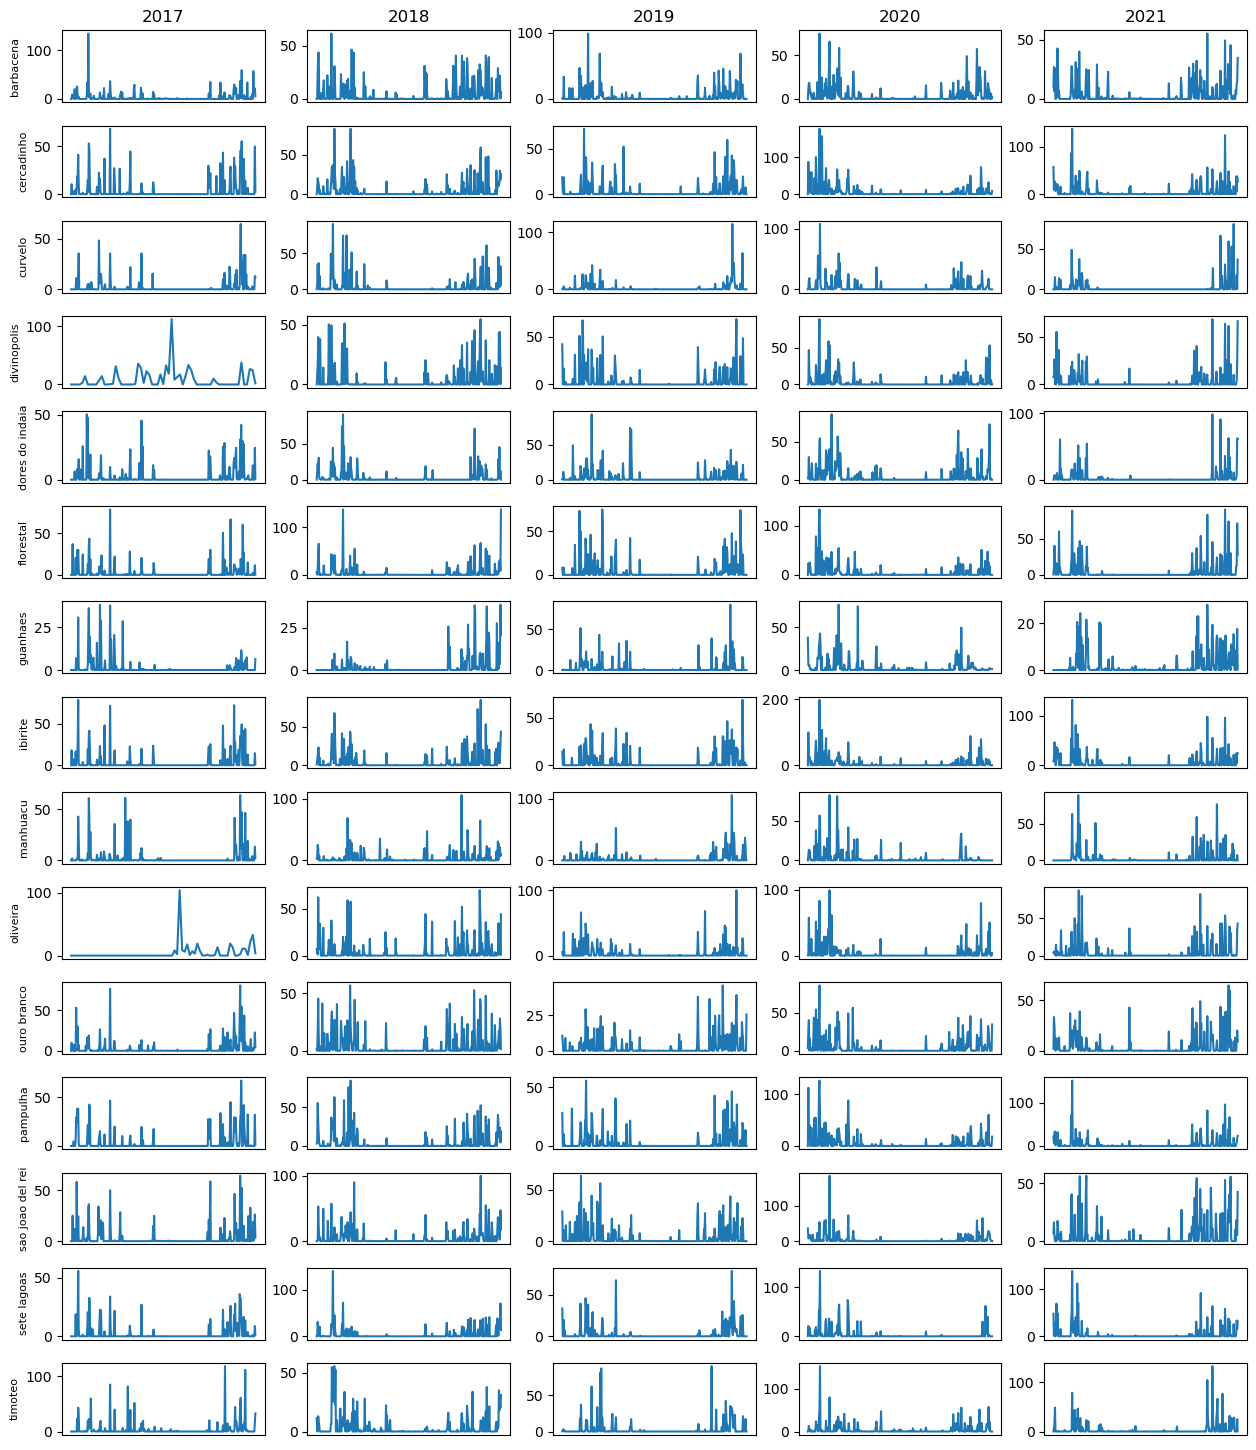

In [76]:
plot_rain_by_day_station(dfs_by_year)

In [229]:
def plot_hourly_heatmap_for_station(dfs_by_year,station):
    matrix = []
    for year in dfs_by_year:
        df=dfs_by_year[year][dfs_by_year[year]['NOME ESTACAO']==station].copy()
        df['Data'] = pd.to_datetime(df['Data'])
        df=df.set_index('timestamp').asfreq('H')
        df = df.reindex(pd.date_range(f'01-01-{year}', f'31-12-{year} 23:00',freq='H',tz='UTC'))
        line = df['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'].tolist()
        if len(line) ==8760:
            line+=[np.nan]*24
        matrix.append(line)
    matrix=np.array(matrix)
    plt.figure(figsize=(20,3))
    sns.heatmap(matrix+1,yticklabels=dfs_by_year.keys(), norm=LogNorm(),cmap='viridis')
    plt.xticks([])

In [263]:
def plot_daily_heatmap_for_station(dfs_by_year,station):
    matrix = []
    for year in dfs_by_year:
        df=dfs_by_year[year][dfs_by_year[year]['NOME ESTACAO']==station].copy()
        df=df.set_index('timestamp').asfreq('H')
        df = df.reindex(pd.date_range(f'01-01-{year}', f'31-12-{year} 23:00',freq='H',tz='UTC')).reset_index()
        df['Data'] = df['index'].apply(lambda x:x.strftime('%Y-%m-%d'))
        df['Data'] = pd.to_datetime(df['Data'])
        line = df.groupby('Data')['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'].sum(min_count=1).tolist()
        if len(line) ==365:
            line.append(np.nan)
        matrix.append(line)
    matrix=np.array(matrix)
    plt.figure(figsize=(20,3))
    sns.heatmap(matrix+1,yticklabels=dfs_by_year.keys(), norm=LogNorm(),cmap='viridis')
    plt.xticks([])

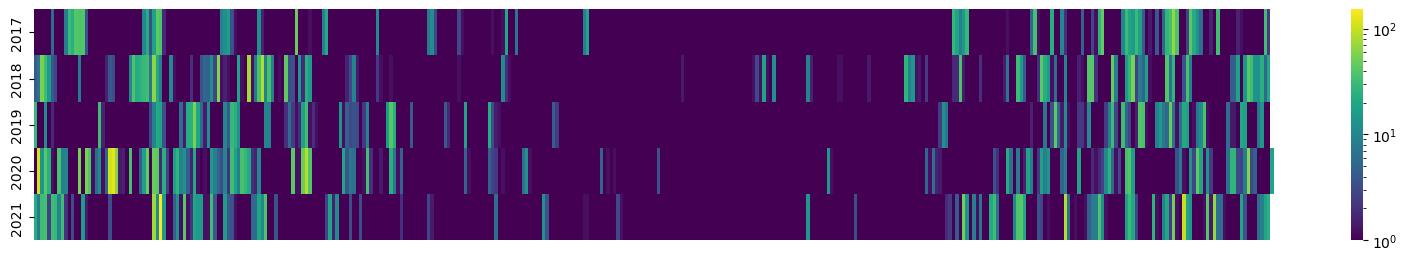

In [265]:
d=plot_daily_heatmap_for_station(dfs_by_year,'pampulha')